In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

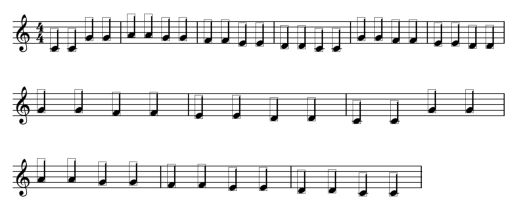

In [134]:
img = cv.imread("Twinkle.png", cv.IMREAD_GRAYSCALE)

template = cv.imread("quarter3.PNG", cv.IMREAD_GRAYSCALE)

w, h = template.shape[::-1]

method = 'cv.TM_CCOEFF'
method = eval(method)

res = cv.matchTemplate(img, template, cv.TM_CCOEFF_NORMED)

threshold = 0.7
loc = np.where( res >= threshold)

rects = list(zip(*loc[::-1]))
rects = sorted(rects, key = lambda x: (x[0], x[1]))
rects = np.asarray(rects)

keep = [0]
x_margin = 20
y_margin = 20
prev_x = rects[0][0]
prev_y = rects[0][1]

for i in range(1, rects.shape[0]):
    if (abs(rects[i][0] - prev_x) > x_margin or abs(rects[i][1] - prev_y) > y_margin):
        keep.append(i)
        prev_x = rects[i][0]
        prev_y = rects[i][1]
        
rects = rects[keep]
        
for pt in rects:
    cv.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,0,255), 1)

_ = plt.imshow(img, cmap = plt.cm.gray)
_ = plt.xticks([])
_ = plt.yticks([])
_ = plt.box(0)